Nuestro objetivo es hacer un Análisis Exploratorio de Datos de los tres conjuntos de datos limpios: las reseñas de usuarios (data_reviews), la información de los juegos (data_output) y las interacciones entre ellos (data_items). Mediante el uso de estadísticas descriptivas y visualizaciones, buscaremos comprender mejor las distribuciones, preferencias y tendencias a lo largo del tiempo. Además, pretendemos identificar las variables más relevantes y significativas dentro de estos conjuntos de datos para obtener una comprensión más profunda y completa de la relación entre los usuarios y los juegos.

### Importaccion las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Extraccion de los datos a partir de archivos CSV

In [2]:
df_output = pd.read_csv("data_repo/output_steam_games_limpio.csv")

In [3]:
df_reviews = pd.read_csv("data_repo/user_reviews_limpio.csv")

In [5]:
df_items = pd.read_csv("data_repo/users_items_limpio.csv")

## EDA - DATASET OUTPUT

In [7]:
df_output.shape

(28834, 6)

In [6]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28834 entries, 0 to 28833
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_name       28834 non-null  object 
 1   id             28834 non-null  int64  
 2   developer      28834 non-null  object 
 3   price_numeric  28834 non-null  float64
 4   release_year   28834 non-null  int64  
 5   main_genre     28834 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [8]:
df_output.columns

Index(['app_name', 'id', 'developer', 'price_numeric', 'release_year',
       'main_genre'],
      dtype='object')

In [11]:
# Se crea un subconjunto del DataFrame df_output que contiene solo las columnas "release_year" y "price_number"
df_subset_output = df_output[["release_year", "price_numeric"]]

# Se obtiene estadísticas descriptivas sobre el subconjunto de datos
# Esto proporciona información sobre la distribución y la dispersión de los datos en las columnas seleccionadas
descripcion_estadistica = df_subset_output.describe()
descripcion_estadistica


,release_year,price_numeric
count,28834.000000,28834.000000
mean,2014.855379,8.626096
std,3.242384,15.809040
min,1983.000000,0.000000
25%,2014.000000,1.990000
50%,2016.000000,4.990000
75%,2017.000000,9.990000
max,2021.000000,995.000000


* Compleción de datos: No se encontraron valores nulos en ninguna de las variables del DataFrame.

* Tamaño del DataFrame: El DataFrame contiene un total de 28834 registros y 6 columnas que detallan características de los juegos.

* Tipos de datos predominantes: Se observa que la mayoría de los datos en el DataFrame son del tipo object, lo que indica que las características principales de los juegos pueden estar representadas como texto o cadenas de caracteres. Sin embargo, también se encontraron tipos de datos int y float, lo que sugiere la presencia de variables numéricas en el conjunto de datos.

## Analisis de la variable main_genre

Esta columna analizaremos cual es el género predominante o principal al que se atribuye cada juego en el conjunto de datos.

In [12]:
df_output["main_genre"].unique()

array(['Action', 'Free to Play', 'Casual', 'Adventure', 'Racing',
       'Strategy', 'Indie', 'RPG', 'Simulation', 'Sports',
       'Massively Multiplayer', 'Sin Dato', 'Animation &amp; Modeling',
       'Utilities', 'Education', 'Design &amp; Illustration',
       'Audio Production', 'Video Production', 'Software Training',
       'Accounting', 'Web Publishing', 'Photo Editing', 'Early Access'],
      dtype=object)

In [13]:
# Se calcula el ranking de los géneros principales en el DataFrame df_output
ranking_generos = df_output["main_genre"].value_counts()

# Se selecciona el top 10 géneros más comunes
top_10_gen = ranking_generos.head(10)
top_10_gen

main_genre
Action                       11241
Casual                        4337
Adventure                     4315
Indie                         3298
Simulation                    1836
Strategy                      1126
RPG                            677
Free to Play                   516
Racing                         454
Design &amp; Illustration      327
Name: count, dtype: int64

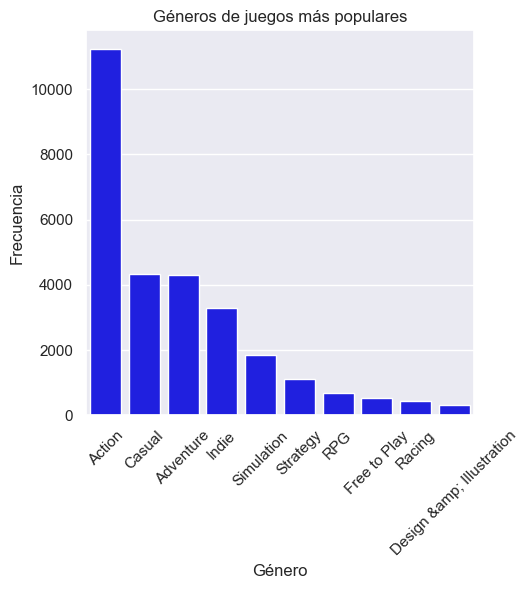

In [14]:
# Se configura el tamaño de la figura del gráfico
plt.figure(figsize=(5, 5))
# Se crea un gráfico de barras utilizando Seaborn
sns.barplot(x=top_10_gen.index, y=top_10_gen.values, color="blue")
# Se nombres un título al gráfico y ejes X, Y
plt.title("Géneros de juegos más populares")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
# Se rota las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()

## Analisis de la variable Developer

En esta columna analizaremos la distribución de los desarrolladores y determinaremos cuáles tienen la mayor cantidad de juegos en el conjunto de datos.

In [15]:
# Se calcula el ranking de los desarrolladores en función de la cantidad de juegos que han creado
ranking_developers = df_output["developer"].value_counts()
# Se calcula el top 10
top_10_developer = df_output["developer"].value_counts().head(10)
# Se muestra el top 10
top_10_developer

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
Capcom                         130
Ronimo Games                   123
Choice of Games                100
Stainless Games                 95
Musopia                         95
Name: count, dtype: int64

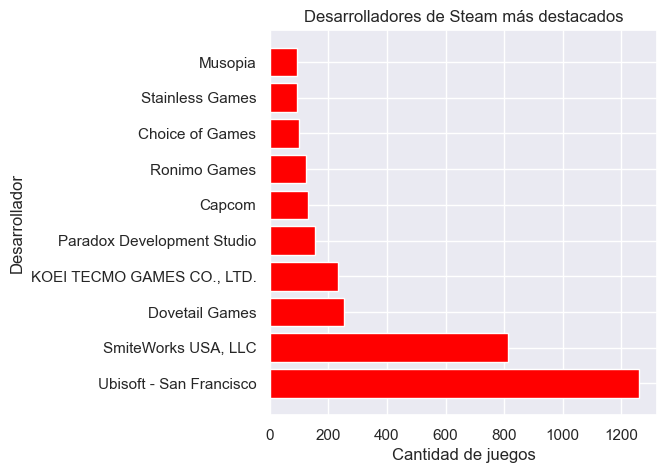

In [16]:
# Se configura el tamaño de la figura del gráfico
plt.figure(figsize=(5, 5))
# Se crea un gráfico de barras utilizando Seaborn
plt.barh(top_10_developer.index, top_10_developer.values, color="red")
# Se nombres un título al gráfico y ejes X, Y
plt.title("Desarrolladores de Steam más destacados")
plt.ylabel("Desarrollador")
plt.xlabel("Cantidad de juegos")
# Se muestra el gráfico
plt.show()

## Analisis de la variable app_name e id

* La variable app_name nos representa el nombre los juegos 
* La variable id se asigna una serie numerica a cada juego

In [17]:
df_output["app_name"].unique()

array(['Lost Summoner Kitty', 'Ironbound', 'Real Pool 3D - Poolians', ...,
       'LOGistICAL: South Africa', 'Russian Roads', 'EXIT 2 - Directions'],
      dtype=object)

## Analisis de la variable release_year

En esta columna analizaremos cuántos juegos se lanzaron en cada año para entender mejor la distribución temporal de los lanzamientos de juegos en nuestro conjunto de datos.

In [20]:
# Se calcula la frecuencia de los años de lanzamiento y se ordena por año
release_year_counts = df_output["release_year"].value_counts().sort_index()
# Se muestra los ultimos 10 años
release_year_counts.tail(10)

release_year
2011     551
2012    1148
2013    1440
2014    2736
2015    5075
2016    6707
2017    9200
2018      92
2019       3
2021       1
Name: count, dtype: int64

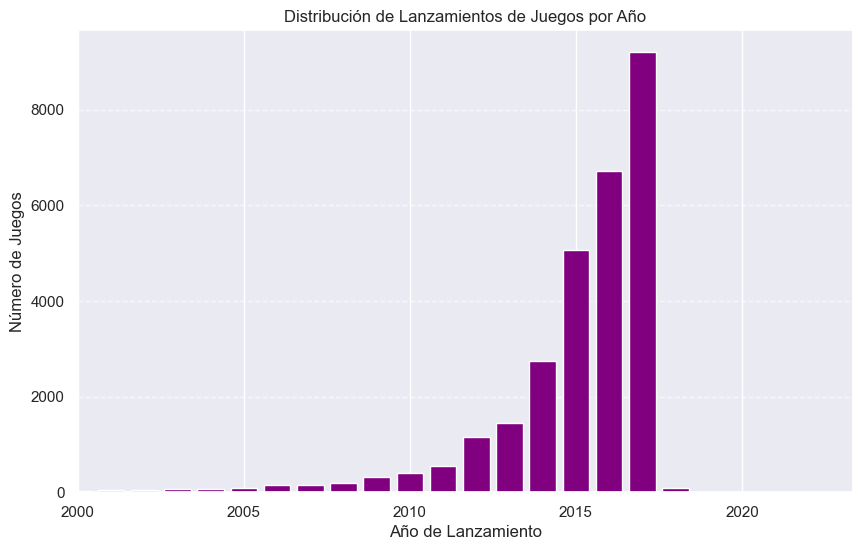

In [21]:
# Se configura el tamaño de la figura del gráfico
plt.figure(figsize=(10, 6))

# Se crea un gráfico de barras utilizando Matplotlib
plt.bar(release_year_counts.index, release_year_counts.values, color="purple")

# Se agrega un título al gráfico, y ejes X Y
plt.title("Distribución de Lanzamientos de Juegos por Año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")

# Se agrega una cuadrícula en el eje Y con un estilo de línea punteada y transparencia
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Se establece un límite mínimo en el eje X para mostrar solo los años a partir de 2000
plt.xlim(left=2000)

# Se muestra el gráfico
plt.show()

### Analisis de correlaciones

Relación entre Año de Lanzamiento y Género de Juegos

<Figure size 1400x800 with 0 Axes>

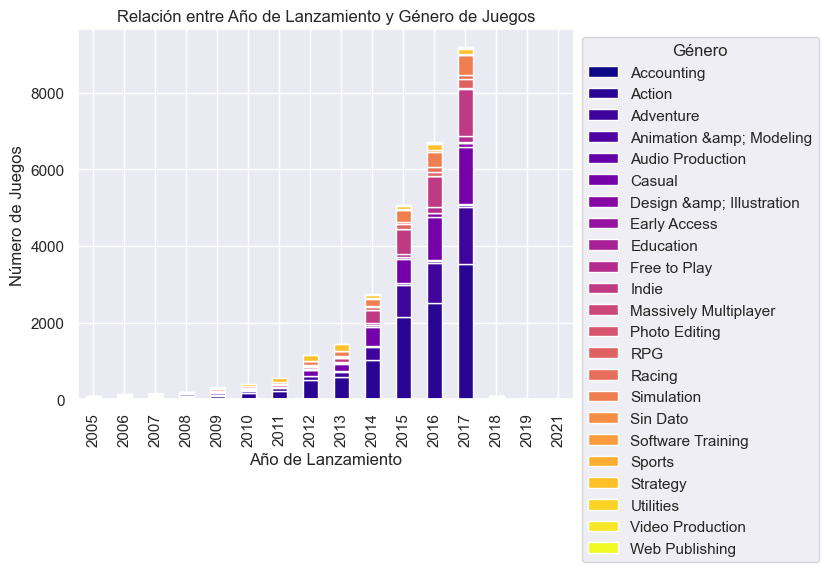

In [25]:
# Se crea una tabla dinámica para contar el número de juegos por año y género
pivot_table = df_output.pivot_table(index="release_year", columns="main_genre", aggfunc="size", fill_value=0)

# Se filtra la tabla para incluir solo años a partir de 2005
pivot_table = pivot_table[pivot_table.index >= 2005]

# Se crea el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
pivot_table.plot(kind="bar", stacked=True, colormap="plasma")

# Se agregan título y etiquetas de ejes
plt.title("Relación entre Año de Lanzamiento y Género de Juegos")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")

# Se agrega una leyenda con título y ajustar posición
plt.legend(title="Género", bbox_to_anchor=(1, 1), loc="upper left")

# Se muestra el gráfico
plt.show()


Relación entre Año de Lanzamiento y Desarrolladores (Top 10)

<Figure size 1400x800 with 0 Axes>

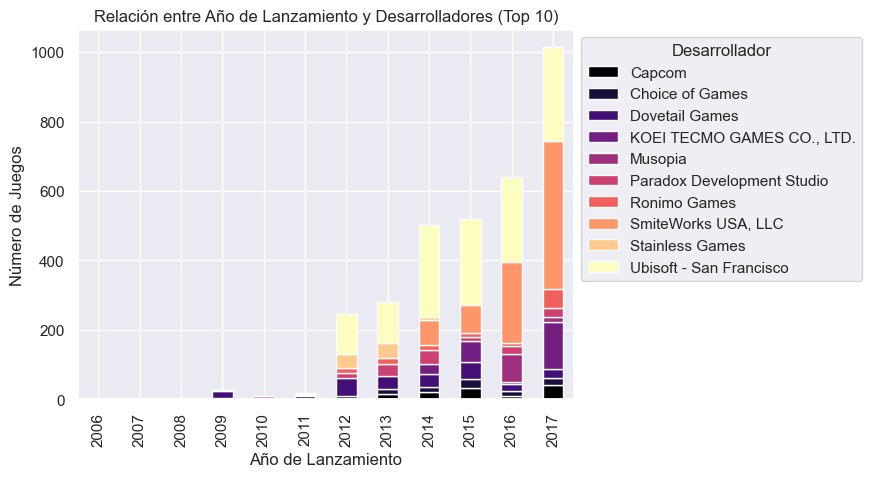

In [24]:
# Se obtienen los 10 principales desarrolladores por número de juegos
top_10_developers = df_output["developer"].value_counts().head(10).index

# Se filtra el DataFrame para incluir solo juegos de los 10 principales desarrolladores
df_top_developers = df_output[df_output["developer"].isin(top_10_developers)]

# Se crea una tabla dinámica para contar el número de juegos por año y desarrollador
pivot_table_developers = df_top_developers.pivot_table(index='release_year', columns='developer', aggfunc='size', fill_value=0)

# Se filtra la tabla para incluir solo años a partir de 2005
pivot_table_developers = pivot_table_developers[pivot_table_developers.index >= 2005]

# Se crea el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
pivot_table_developers.plot(kind="bar", stacked=True, colormap="magma")

# Se agrega título y etiquetas de ejes
plt.title("Relación entre Año de Lanzamiento y Desarrolladores (Top 10)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")

# Se agrega leyenda con título y se ajusta la posición
plt.legend(title="Desarrollador", bbox_to_anchor=(1, 1), loc="upper left")

# Se muestra el gráfico
plt.show()


## EDA - DATASET ITEMS

In [26]:
df_items.shape

(3002801, 5)

In [27]:
df_items.columns

Index(['user_id', 'items_count', 'item_id', 'item_name', 'playtime_forever'], dtype='object')

In [30]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002801 entries, 0 to 3002800
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           int64  
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


In [31]:
df_items.isnull().sum()

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

In [32]:
# Se establece la opción de formato para mostrar solo 3 decimales en los números de punto flotante
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Se genera un resumen estadístico del DataFrame df_items
df_items.describe()

,items_count,item_id,playtime_forever
count,3002801.000,3002801.000,3002801.000
mean,323.651,202377.222,773.745
std,723.548,122934.396,4043.478
min,1.000,20.000,0.000
25%,70.000,91310.000,0.000
50%,135.000,224260.000,43.000
75%,275.000,285900.000,342.000
max,7762.000,530720.000,635295.000


* No se encontraron valores nulos en ninguna de las variables.
* El DataFrame consta de 3002801 registros y 5 columnas, proporcionando detalles sobre los juegos de cada usuario y el tiempo dedicado a ellos.
* La mayoría de los datos son del tipo entero, aunque también se encuentran tipos object y float.

## Analisis de la variable user_id

En esta columna analizaremos el identificador unico para cada usuario

In [33]:
if df_items["user_id"].nunique() == len(df_items):
    print("Todos los user_ids son únicos.")
else:
    print("Hay duplicados en los user_ids.")

Hay duplicados en los user_ids.


En esta variable, es necesario tener en cuenta que el DataFrame df_items registra cada juego consumido por cada usuario. Dado que un usuario puede consumir más de un juego, es posible que haya valores duplicados en el conjunto de datos.

## Analisis de la variable items_count

En esta columna analizaremos la cantidad de juegos consumidos por cada usuario

In [34]:
df_items["items_count"].describe()

count   3002801.000
mean        323.651
std         723.548
min           1.000
25%          70.000
50%         135.000
75%         275.000
max        7762.000
Name: items_count, dtype: float64

Al analizar la distribución del número de juegos consumidos por usuario en el DataFrame, observamos que el 75% de los usuarios consumieron entre 1 y 275 juegos. Además, identificamos un máximo de 7762 juegos consumidos por usuario, mientras que el mínimo es de 1 juego. En promedio, cada usuario consumió alrededor de 324 juegos.

## Analisis de la variable item_name

En esta columna analizaremos el nombre del juego que cada usuario consumio.

In [35]:
# Se obtienen los 10 juegos más populares contando el número de veces que aparece cada nombre de juego
top_10_juegos = df_items["item_name"].value_counts().head(10)
top_10_juegos

item_name
Dota 2 Test           49571
Unturned              38682
Left 4 Dead 2         37044
Left 4 Dead 2 Beta    37044
Terraria              29239
Warframe              25807
Portal 2              24465
PAYDAY 2              23729
Robocraft             21785
Borderlands 2         21029
Name: count, dtype: int64

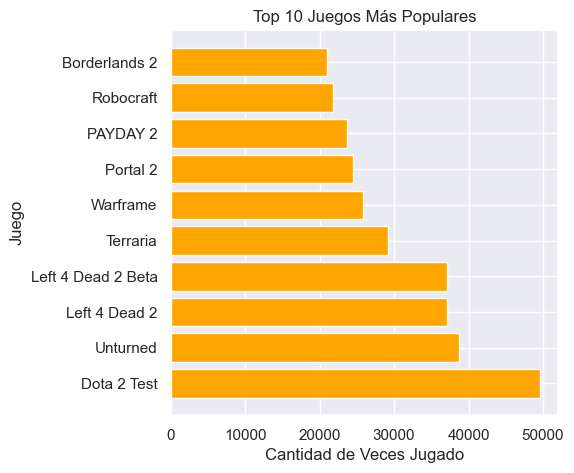

In [38]:
# Se crea un gráfico de barras horizontales para mostrar los 10 juegos más populares
plt.figure(figsize=(5, 5))
plt.barh(top_10_juegos.index, top_10_juegos.values, color="Orange")

# Se agrega un título y etiquetas a los ejes
plt.title("Top 10 Juegos Más Populares")
plt.ylabel("Juego")
plt.xlabel("Cantidad de Veces Jugado")

# Se muestra el gráfico
plt.show()


## Analisis de la variable playtime_forever

En esta columna analizaremos el tiempo de juego que consumio el usuario por cada juego

In [39]:
# Se calcula la cantidad de horas jugadas dividiendo el tiempo total jugado en minutos entre 60
df_items["playtime_hours"] = df_items["playtime_forever"]/60
df_items["playtime_hours"].describe()

count   3002801.000
mean         12.896
std          67.391
min           0.000
25%           0.000
50%           0.717
75%           5.700
max       10588.250
Name: playtime_hours, dtype: float64

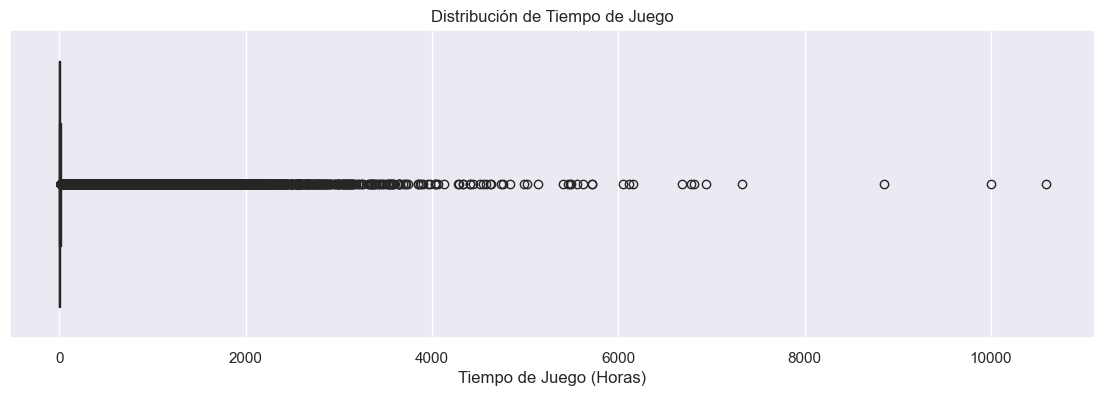

In [40]:
# Se crea un gráfico de caja para visualizar la distribución del tiempo total de juego en horas
plt.figure(figsize=(14, 4))
sns.boxplot(x=df_items["playtime_hours"], color="purple")

# Se agrega un título y etiquetas a los ejes del gráfico
plt.title("Distribución de Tiempo de Juego")
plt.xlabel("Tiempo de Juego (Horas)")

# Se muestra el gráfico
plt.show()


In [41]:
# Se calculan los cuartiles y el rango intercuartílico (IQR) para identificar los valores atípicos
Q1 = df_items["playtime_hours"].quantile(0.25)
Q3 = df_items["playtime_hours"].quantile(0.75)
IQR = Q3 - Q1

# Se establecen los límites para identificar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Se identifican los valores atípicos tanto por debajo como por encima de los límites establecidos
outliers_lower = df_items[df_items["playtime_hours"] < lower_limit]
outliers_upper = df_items[df_items["playtime_hours"] > upper_limit]

# Se cuentan y muestran los valores atípicos por encima del límite superior
num_outliers_upper = len(outliers_upper)
print(f'Número de valores atípicos por encima del límite superior: {num_outliers_upper}')

# Se muestra el límite superior para valores atípicos
print(f'Límite superior para valores atípicos: {upper_limit}')


Número de valores atípicos por encima del límite superior: 433286
Límite superior para valores atípicos: 14.25


Podemos deducir que la mayoría de los usuarios (aproximadamente el 75%) juegan entre 0 y 5700 horas, con un máximo de 10588.25 horas. Sin embargo, el promedio de horas jugadas es de 12.896 horas. También es notable que hay 433286 valores atípicos que superan el límite de 14.25 horas.

## Analisis de la variable item_id

En esta columna analizaremos la identificacion de cada juego

In [43]:
# Se cuentan los valores únicos en la columna "item_id" y se muestran los 10 más frecuentes
top_10_item_ids = df_items["item_id"].value_counts().head(10)
top_10_item_ids

item_id
205790    49571
304930    38682
550       37044
223530    37044
105600    29239
230410    25807
620       24465
218620    23729
301520    21785
49520     21029
Name: count, dtype: int64

In [45]:
# Se agrupa por "item_id" y se calcula la suma del tiempo total de juego para cada elemento
total_playtime_by_item = df_items.groupby("item_id")["playtime_hours"].sum().sort_values(ascending=False)

# Se seleccionan el top 5 elementos con mayor tiempo total de juego
top_items = total_playtime_by_item.head(5)
top_items


item_id
105600   2582909.017
230410   2067128.383
550      1703157.050
218620   1662731.900
252490   1352006.933
Name: playtime_hours, dtype: float64

## Analisis de correlaciones

Relacion de Usuarios con mayor tiempo de juego consumido

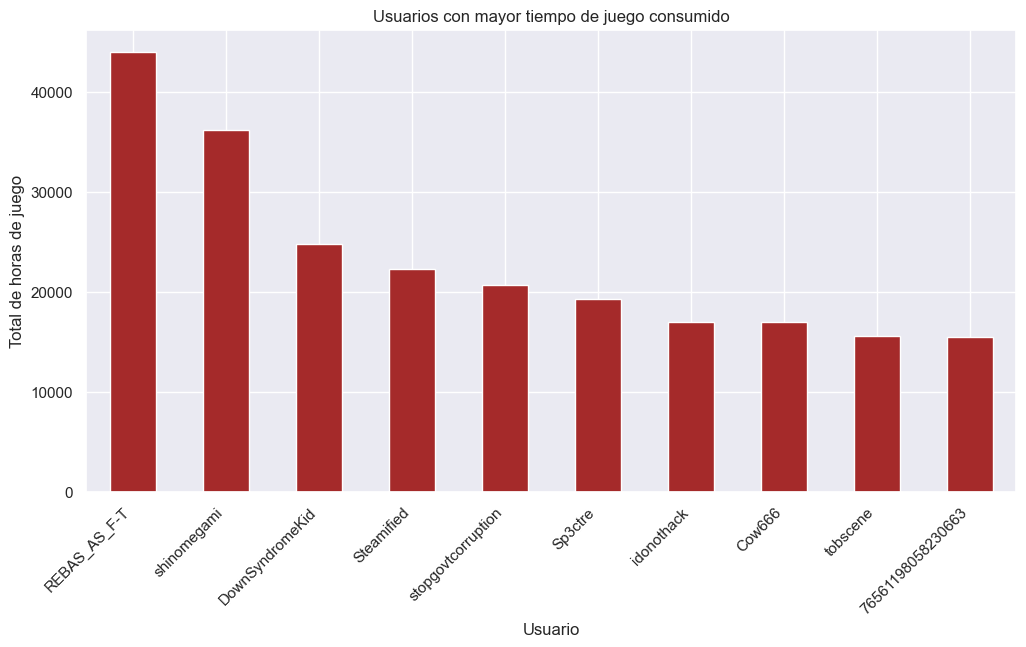

In [46]:
# Se calcula el tiempo total de juego por usuario y se seleccionan los 10 usuarios con mayor tiempo de juego
total_playtime_by_user = df_items.groupby("user_id")["playtime_hours"].sum().sort_values(ascending=False)
top_users = total_playtime_by_user.head(10)

# Se crea un gráfico de barras para visualizar los 10 usuarios con mayor tiempo de juego
plt.figure(figsize=(12, 6))
top_users.plot(kind="bar", color="Brown")

# Se añade título y etiquetas a los ejes del gráfico
plt.title("Usuarios con mayor tiempo de juego consumido")
plt.xlabel("Usuario")
plt.ylabel("Total de horas de juego")
plt.xticks(rotation=45, ha="right")

# Se muestra el gráfico
plt.show()


Relacion de Top 10 usuarios que más juegos consumieron

In [49]:
# Se ordena el DataFrame por "items_count" en orden descendente
df_ordenado_x_itemcount = df_items.sort_values(by="items_count", ascending=False)

# Se obtiene el ID de usuario y el valor de "items_count" del primer registro (el mayor "item_count")
usuario_mayor_item_count = df_ordenado_x_itemcount.iloc[0]["user_id"]
mayor_item_count = df_ordenado_x_itemcount.iloc[0]["items_count"]

# Se imprime la información del usuario con el mayor "item_count"
print(f'Usuario con el mayor item_count: {usuario_mayor_item_count}')
print(f'Mayor item_count: {mayor_item_count}')


Usuario con el mayor item_count: phrostb
Mayor item_count: 7762


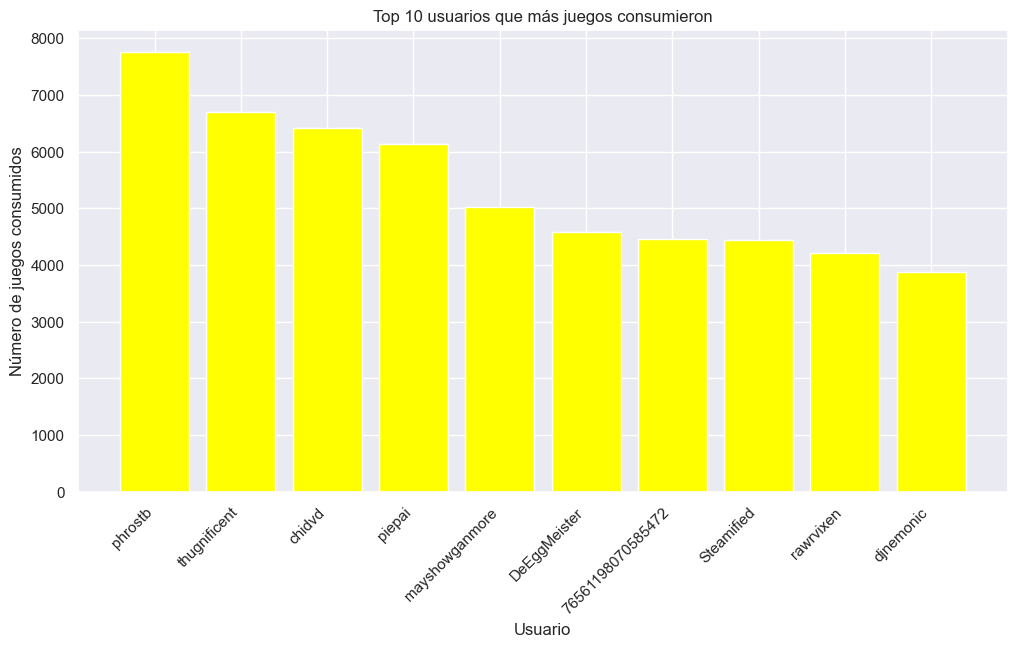

In [52]:
# Se calcula el valor máximo de "items_count" por usuario y se seleccionan los 10 usuarios con mayores valores
items_count_user = df_items.groupby("user_id")["items_count"].max().sort_values(ascending=False)
top_users = items_count_user.head(10)

# Se crea un gráfico de barras para visualizar los 10 usuarios con mayores valores de "items_count"
plt.figure(figsize=(12, 6))
plt.bar(top_users.index, top_users.values, color="Yellow")

# Se añade título y etiquetas a los ejes del gráfico
plt.title("Top 10 usuarios que más juegos consumieron")
plt.xlabel("Usuario")
plt.ylabel("Número de juegos consumidos")
plt.xticks(rotation=45, ha="right")

# Se muestra el gráfico
plt.show()


## EDA - DATASET REVIEWS


In [53]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57538 entries, 0 to 57537
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             57538 non-null  object
 1   item_id             57538 non-null  int64 
 2   recommend           57538 non-null  bool  
 3   year_posted         57538 non-null  int64 
 4   sentiment_analysis  57538 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.8+ MB


In [54]:
df_reviews.columns

Index(['user_id', 'item_id', 'recommend', 'year_posted', 'sentiment_analysis'], dtype='object')

In [55]:
df_reviews.shape

(57538, 5)

In [56]:
df_reviews.describe()

,item_id,year_posted,sentiment_analysis
count,57538.000,57538.000,57538.000
mean,169504.798,2013.952,1.292
std,132008.964,0.881,0.693
min,10.000,2010.000,0.000
25%,8930.000,2013.000,1.000
50%,218230.000,2014.000,1.000
75%,261640.000,2015.000,2.000
max,527340.000,2015.000,2.000


Analisis de cada variable:
* user_id:
    Esta columna sirve para identificar a los usuarios.
    No parece haber datos faltantes en esta columna, ya que hay 57538 entradas en total.

* item_id:
    Representa los identificadores de los ítems.

* recommend:
    Es una variable booleana (True/False) que indica si se recomienda o no.

* year_posted:
    Indica el año en que se publicó la reseña.
    Los años van desde 2010 hasta 2015.
    La mayoría de las reseñas se concentran entre 2013 y 2015, según los percentiles.

* sentiment_analysis:
    Muestra el resultado del análisis de sentimiento.
    Es una variable categórica con valores 0, 1 y 2.
    La mayoría de las opiniones parecen ser positivas, ya que la media es 1.292 y el 75% de las opiniones tienen una puntuación de 2.

## Analisis de la variable user_id

En esta columna analizaremos la identificación única para cada usuario. Ahora procederemos a analizar la frecuencia con la que cada usuario realiza reseñas

In [57]:
df_reviews["user_id"].value_counts()

user_id
NocturnalPotato      10
76561198061759775    10
TheWatchdogEM        10
teejamon             10
yoshi278             10
                     ..
76561198047306749     1
Varck                 1
76561198106998900     1
Smithy199             1
JDMBRAH               1
Name: count, Length: 25138, dtype: int64

Podemos observar que el número máximo de reseñas realizadas por un usuario es 10, mientras que el mínimo es solo una reseña.

## Analisis de la variable year_posted

En esta columna analizaremos el año en el que se realizó la reseña.

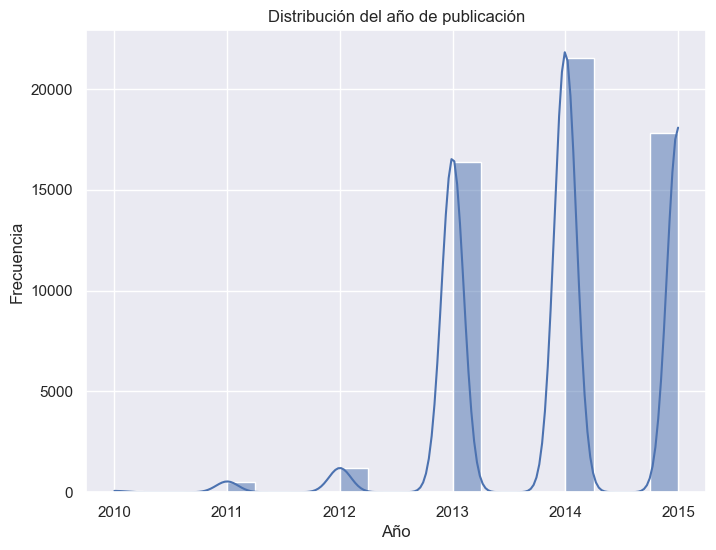

In [58]:
# Se establece el tamaño de la figura del gráfico
plt.figure(figsize=(8, 6))

# Se crea un histograma con seaborn para visualizar la distribución del año de publicación
sns.histplot(df_reviews['year_posted'], bins=20, kde=True)

# Se añade título y etiquetas a los ejes del gráfico
plt.title('Distribución del año de publicación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Se muestra el gráfico
plt.show()

In [59]:
df_reviews["year_posted"].value_counts()

year_posted
2014    21548
2015    17832
2013    16377
2012     1187
2011      528
2010       66
Name: count, dtype: int64

## Analisis de la variable item_id

Esta variable representa el identificador único de cada juego.

In [61]:
# Se obtiene el recuento de reseñas por item_id y se toman los 10 principales
top_items = df_reviews["item_id"].value_counts()
top_10_items = top_items.head(10)
top_10_items

item_id
730       3654
440       3649
4000      1673
570       1524
218620    1089
304930    1013
252490     797
550        732
221100     721
105600     718
Name: count, dtype: int64

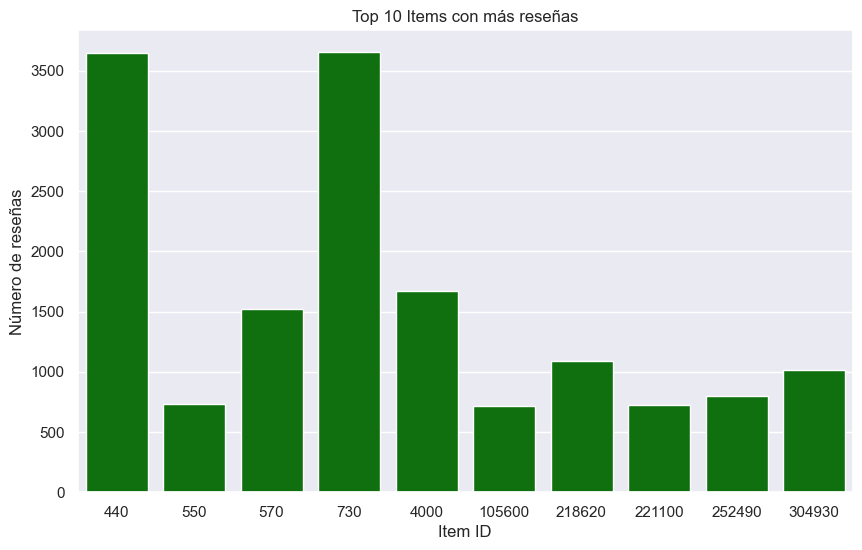

In [62]:
# Se crea un gráfico de barras utilizando Seaborn para visualizar los 10 principales ítems con más reseñas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.index, y=top_10_items.values, color="Green")

# Se añaden títulos y etiquetas a los ejes del gráfico
plt.title("Top 10 Items con más reseñas")
plt.xlabel("Item ID")
plt.ylabel("Número de reseñas")

# Se muestra el gráfico
plt.show()


## Analisis de la variable sentiment_analysis

En esta columna analizaremos la naturaleza de las reseñas de los usuarios sobre los juegos, donde 0 representa una opinión negativa, 1 una opinión neutral y 2 una opinión positiva.

In [63]:
# Se calcula el número total de reseñas para cada categoría de análisis de sentimiento
sentiment_analysis_0 = df_reviews[df_reviews["sentiment_analysis"] == 0].value_counts().sum()
sentiment_analysis_1 = df_reviews[df_reviews["sentiment_analysis"] == 1].value_counts().sum()
sentiment_analysis_2 = df_reviews[df_reviews["sentiment_analysis"] == 2].value_counts().sum()

# Se imprimen los resultados
print(f"Total de reseñas negativas: {sentiment_analysis_0}")
print(f"Total de reseñas neutras: {sentiment_analysis_1}")
print(f"Total de reseñas positivas: {sentiment_analysis_2}")


Total de reseñas negativas: 7863
Total de reseñas neutras: 24990
Total de reseñas positivas: 24685


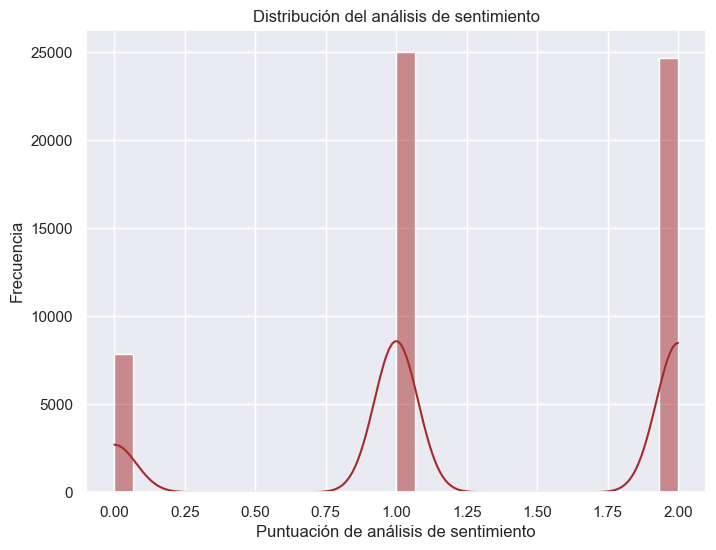

In [64]:
# Se crea un histograma para visualizar la distribución de los puntajes de análisis de sentimiento
plt.figure(figsize=(8, 6))
sns.histplot(df_reviews["sentiment_analysis"], bins=30, kde=True, color="Brown")

# Se agregan títulos y etiquetas a los ejes
plt.title("Distribución del análisis de sentimiento")
plt.xlabel("Puntuación de análisis de sentimiento")
plt.ylabel("Frecuencia")

# Se muestra el gráfico
plt.show()


Analisis de correlaciones


Relacion entre los usuarios más destacados y los elementos más consumidos.

In [65]:
# Se crea una tabla pivote para contar el número de reseñas de cada usuario para cada ítem
user_items = df_reviews.pivot_table(index="user_id", columns="item_id", values="recommend", aggfunc="count", fill_value=0)

# Se identifica el ítem más consumido por cada usuario y su conteo de reseñas
item_mas_consumido_x_usuario = user_items.idxmax(axis=1)
conteo_review_x_usuario = user_items.max(axis=1)

# Se crea un DataFrame con la información obtenida
user_most_reviewed_item = pd.DataFrame({'Item con más reseñas': item_mas_consumido_x_usuario, 'Conteo de reseñas': conteo_review_x_usuario})

# Se muestra el DataFrame resultante
user_most_reviewed_item


,Item con más reseñas,Conteo de reseñas
user_id,,
--000--,1250,1
--ace--,440,1
--ionex--,730,1
-2SV-vuLB-Kg,440,1
-Azsael-,226860,1
...,...,...
zwanzigdrei,440,1
zy0705,440,1
zynxgameth,204300,1


Relacion entre los usuarios principales y los años en los que realizaron reseñas.

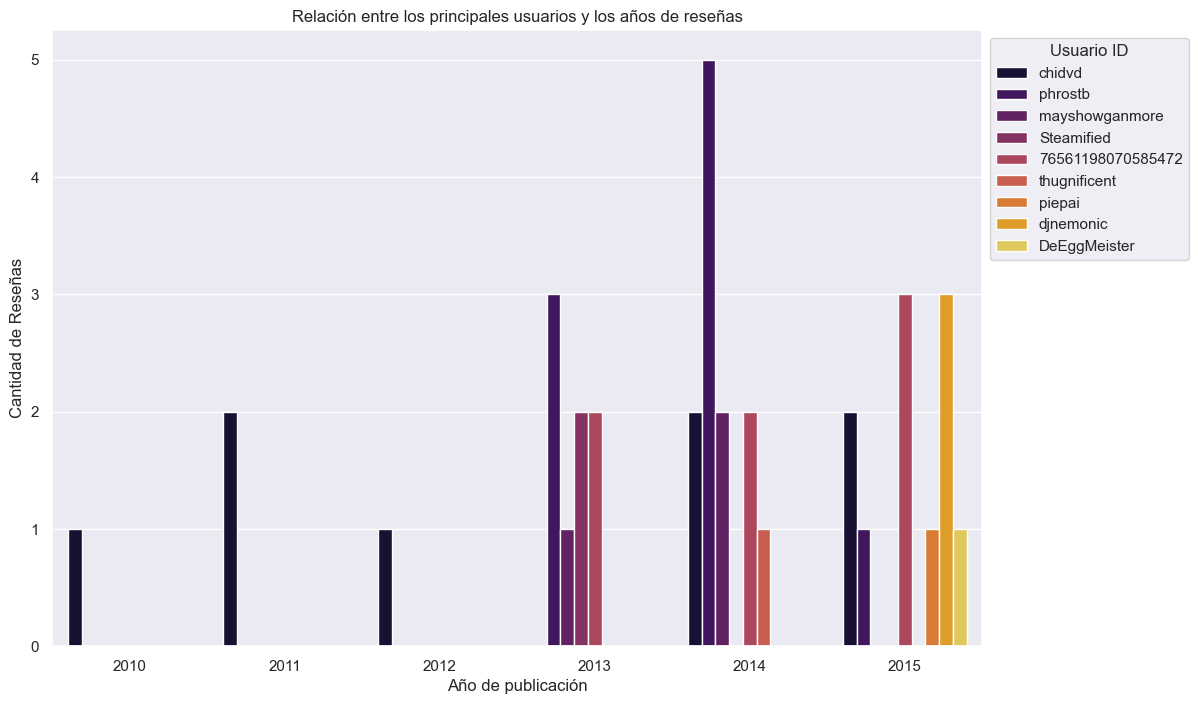

In [69]:
# Se filtran las reseñas de los principales usuarios
top_users_reviews = df_reviews[df_reviews["user_id"].isin(top_users.index)]

# Se crea un gráfico de conteo de reseñas por año para los principales usuarios
plt.figure(figsize=(12,8))
sns.countplot(x="year_posted", hue="user_id", data=top_users_reviews, palette="inferno")

# Se añaden títulos y etiquetas al gráfico
plt.title("Relación entre los principales usuarios y los años de reseñas")
plt.ylabel("Cantidad de Reseñas")
plt.xlabel("Año de publicación")
plt.legend(title="Usuario ID", bbox_to_anchor=(1,1), loc="upper left")

# Se muestra el gráfico
plt.show()


Relación entre los usuarios y sus recomendaciones.

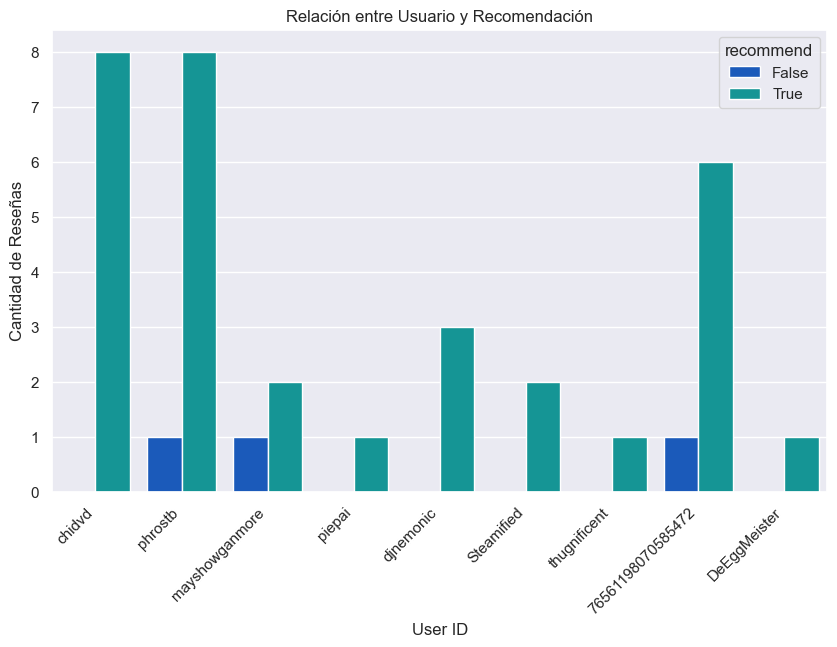

In [70]:
# Se crea un gráfico de conteo de reseñas por usuario y recomendación para los principales usuarios
plt.figure(figsize=(10, 6))
sns.countplot(x="user_id", hue="recommend", data=df_reviews[df_reviews["user_id"].isin(top_users.index)], palette="winter")

# Se añaden títulos y etiquetas al gráfico
plt.title("Relación entre Usuario y Recomendación")
plt.xlabel("User ID")
plt.ylabel("Cantidad de Reseñas")
plt.xticks(rotation=45, ha="right")

# Se muestra el gráfico
plt.show()


Relacion entre la recomendación y el análisis de sentimientos.

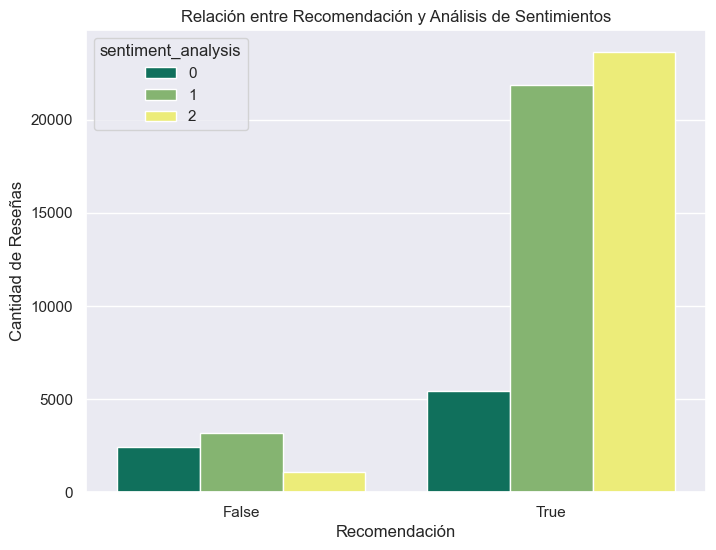

In [71]:
# Se crea un gráfico de conteo de reseñas por recomendación y análisis de sentimientos
plt.figure(figsize=(8, 6))
sns.countplot(x="recommend", hue="sentiment_analysis", data=df_reviews, palette="summer")

# Se añaden títulos y etiquetas al gráfico
plt.title("Relación entre Recomendación y Análisis de Sentimientos")
plt.xlabel("Recomendación")
plt.ylabel("Cantidad de Reseñas")

# Se muestra el gráfico
plt.show()
